# Evan's Python Notes

In [1]:
# Read file into list

with open('input.txt') as f:
    lines = f.read().splitlines()

print(lines)

for line in lines:
    print(line)

['              .-""-.', '             /      \\', '            /     (0 \\______', '            |         "_____)', "            \\        ,-----'", '             \\_    _/', '              /    \\', '             /      \\', '            /        \\', '           /          \\', '          /        :   |', '         /     ;   :   |', "\\\\\\     /  _.-'    :   |", " \\\\\\\\  / _'        :   |", '  \\\\\\\\/ ;         :   /', '   \\\\  ;         :   /', "    \\   `._`-'_.'  _/", "     \\     ''' _.-'", '      \\      / /', '       \\    / /', '        \\  /)(_______', '         )(_________<', '        (__________<', '']
              .-""-.
             /      \
            /     (0 \______
            |         "_____)
            \        ,-----'
             \_    _/
              /    \
             /      \
            /        \
           /          \
          /        :   |
         /     ;   :   |
\\\     /  _.-'    :   |
 \\\\  / _'        :   |
  \\\\/ ;         :   /
   

In [2]:
# Write file

ducks = "Northern Pintail,Green-winged Teal,King Eider"
ducks = ducks.split(",")
print(ducks)

with open('ducks.txt', 'w') as f:
    for duck in ducks:
        f.write("%s\n" % duck)


['Northern Pintail', 'Green-winged Teal', 'King Eider']


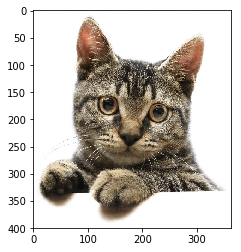

In [3]:
# Read image
import matplotlib.pyplot as plt    # For plotting
import matplotlib.image as mpimg   # For image read
from scipy import ndimage          # For image operations, such as rotation

# Load cat image
imgCat = mpimg.imread('cat.png')
# Show cat image
imgplot = plt.imshow(imgCat)


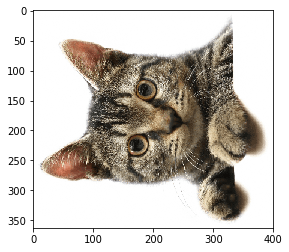

In [4]:
# Rotate 90 degress
imgCatRotated = ndimage.rotate(imgCat, 90)
plt.imshow(imgCatRotated, aspect='equal')

In [5]:
# Write image
plt.savefig("catrotate.png")

In [6]:
# Work with dictionaries
# Demonstration of shallow vs deep copies

nodeTemplate = { "value"      : None,
                 "parent"     : None,
                 "leftchild"  : None,
                 "rightchild" : None }

# Create nodes (using deep copy)
node1 = nodeTemplate.copy()
node1["value"] = 10
node2 = nodeTemplate.copy()
node2["value"] = 20
node3 = nodeTemplate.copy()
node3["value"] = 30
node4 = nodeTemplate.copy()
node4["value"] = 40
node5 = nodeTemplate.copy()
node5["value"] = 50
node6 = nodeTemplate.copy()
node6["value"] = 60
node7 = nodeTemplate.copy()
node7["value"] = 70

# Build tree (using shallow copy)
node1["leftchild"]  = node3
node1["rightchild"] = node2
node3["parent"]     = node1
node2["parent"]     = node1
node2["leftchild"]  = node5
node2["rightchild"] = node6
node5["parent"]     = node2
node6["parent"]     = node2
node6["leftchild"]  = node7
node6["rightchild"] = node4
node4["parent"]     = node6
node7["parent"]     = node6

root = node1

# Function for preorder tree traversal
def preorder(tree):
    if tree:
        print(tree["value"])
        preorder(tree["leftchild"])
        preorder(tree["rightchild"])

preorder(root)

10
30
20
50
60
70
40


In [7]:
# Save python objects using Pickle
import pickle

pickle.dump(root, open("tree.pickle", "wb"))

root2 = pickle.load(open("tree.pickle", "r"))

preorder(root2)


10
30
20
50
60
70
40


In [8]:
# Example of shallow copy issue

a = range(10)
print("a:", a)

b = a              # Shallow copy!
b[5] = b[5] * 10
print ("b:", b)
print ("a:", a)

c = a[:]           # Deep copy
c[5] = c[5] / 10
print ("c:", c)
print ("a:", a)


('a:', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
('b:', [0, 1, 2, 3, 4, 50, 6, 7, 8, 9])
('a:', [0, 1, 2, 3, 4, 50, 6, 7, 8, 9])
('c:', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
('a:', [0, 1, 2, 3, 4, 50, 6, 7, 8, 9])


In [9]:
# Work with numpy for arrays
# "homogeneous multidimensional array", docs.scipy.org
# Scalable, efficient backend for array manipulation

# More examples: https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html

import numpy as np

# Note: list comprehension:
v = [i ** i for i in range(10, 16)]
print(v)
print("")
# Outer list comprehension: rows
# Inner list comprehension: cols
ex = np.array([ [1 + x * y for x in range(1, 11)] for y in range(10)])
print(ex)

# Origin is at UPPER LEFT!      (Same for OpenCV..)
print("upper left:", ex[0][0])
print("lower left:", ex[-1][0])

# Some basic numpy operations
print(ex.shape)     # Size of each dimension (rows, cols, ...)
print(ex.ndim)      # Number of dimensions
print(ex.itemsize)  # Number of bytes in each element
print(ex.T)         # Transpose
print(ex * 0.5)     # Multiple each elem by scalar
print("")

# Indexing (each dimension separated by comma)
print(ex[3:5,:])   # Yield rows 4 and 5
print("")
print(ex[:,5:7])   # Yeild cols 6 and 7
print("")
print(ex[3:5,5:7]) # Combo of above


[10000000000, 285311670611, 8916100448256, 302875106592253, 11112006825558016, 437893890380859375]

[[ 1  1  1  1  1  1  1  1  1  1]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  5  7  9 11 13 15 17 19 21]
 [ 4  7 10 13 16 19 22 25 28 31]
 [ 5  9 13 17 21 25 29 33 37 41]
 [ 6 11 16 21 26 31 36 41 46 51]
 [ 7 13 19 25 31 37 43 49 55 61]
 [ 8 15 22 29 36 43 50 57 64 71]
 [ 9 17 25 33 41 49 57 65 73 81]
 [10 19 28 37 46 55 64 73 82 91]]
('upper left:', 1)
('lower left:', 10)
(10, 10)
2
8
[[ 1  2  3  4  5  6  7  8  9 10]
 [ 1  3  5  7  9 11 13 15 17 19]
 [ 1  4  7 10 13 16 19 22 25 28]
 [ 1  5  9 13 17 21 25 29 33 37]
 [ 1  6 11 16 21 26 31 36 41 46]
 [ 1  7 13 19 25 31 37 43 49 55]
 [ 1  8 15 22 29 36 43 50 57 64]
 [ 1  9 17 25 33 41 49 57 65 73]
 [ 1 10 19 28 37 46 55 64 73 82]
 [ 1 11 21 31 41 51 61 71 81 91]]
[[  0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5]
 [  1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5]
 [  1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.

In [10]:
# Work with spreadsheets
import pandas as pd

# Create data that will become table columns
labels    = ["A", "B", "C", "D", "E"]
lengths   = [45, 28, 78, 3, 33]
locations = ["Corpus Christi", "Corpus Christi", "Port Aransas", "Rockport", "Corpus Christi"]

table = pd.DataFrame(
    { "Labels"    : labels,
      "Lengths"   : lengths,
      "Locations" : locations
    })

print(table)
print("")
print(table.describe()) # Generate stats
print("")
print(table.sort_values(by="Lengths", ascending=False))  # Sort by Lengths
print("")
print(table["Locations"])  # Select by column
print("")
print(table.loc[1:2])          # Slice by rows

table.to_csv("pandas.csv")


  Labels Lengths       Locations
0      A      45  Corpus Christi
1      B      28  Corpus Christi
2      C      78    Port Aransas
3      D       3        Rockport
4      E      33  Corpus Christi

       Labels Lengths       Locations
count       5       5               5
unique      5       5               3
top         D      78  Corpus Christi
freq        1       1               3

  Labels Lengths       Locations
2      C      78    Port Aransas
0      A      45  Corpus Christi
4      E      33  Corpus Christi
1      B      28  Corpus Christi
3      D       3        Rockport

0    Corpus Christi
1    Corpus Christi
2      Port Aransas
3          Rockport
4    Corpus Christi
Name: Locations, dtype: object

  Labels Lengths       Locations
1      B      28  Corpus Christi
2      C      78    Port Aransas


In [25]:
# Using homemade libraries
import converters                          # Import as-is
import converters as conv                  # Import with shorter name
from converters import celsius2fahrenheit  # Import only a specific function

degc = 0.0
degf = celsius2fahrenheit(degc)
print(degf, "degrees fahrenheit")

degc = conv.fahrenheit2celsius(degf)
print(degc, "degrees celsius")

(32.0, 'degrees fahrenheit')
(0.0, 'degrees celsius')


In [43]:
# Working with directories
# (And a quick look at try-catch error handling)
# Source: https://stackabuse.com/creating-and-deleting-directories-with-python/

import os # Requires interfacing with the operating system
os.chdir("/home/user")


path = os.getcwd()
print ("In directory %s" % path)   # Note how formatting print is done

# Directories to make
path = "/home/user/new"

# Create directory
try:
    os.mkdir(path)
except OSError:
    print ("[-] Creation of %s failed" % path)
else:
    print ("[+] Created %s" % path)

# Enter directory
try:
    os.chdir(path)
except OSError:
    print ("[-] Entering %s failed" % path)
else:
    print ("[+] Entered %s" % path)

path = os.getcwd()
print ("In directory %s" % path)

# Why use try-catch when we just made the directory?
# We can't ensure what rest of system us doing: assume the worst!

# Leave directory
try:
    os.chdir("..")
except OSError:
    print ("[-] Entering %s failed" % "..")
else:
    print ("[+] Entered %s" % "..")

# Remove directory
try:
    os.rmdir(path)
except OSError:  
    print ("Deletion of %s failed" % path)
else:
    print ("Deleted %s" % path)

In directory /home/user
[+] Created /home/user/new
[+] Entered /home/user/new
In directory /home/user/new
[+] Entered ..
Deleted /home/user/new


In [47]:
from subprocess import call
import os

# Get return value  (find out if command ran, etc)
res = call(["ls", "-l"])
print(res)

# Get actual command output
print os.popen("ls -l").read()

0
total 882
-rw-r--r-- 1 user user 250818 Oct  9 03:12 bill.jpg
-rw-r--r-- 1 user user  72367 Oct  9 03:17 cat.png
-rw-r--r-- 1 user user   1274 Oct  9 14:56 catrotate.png
-rw-r--r-- 1 user user    171 Oct  9 15:13 converters.py
-rw-r--r-- 1 user user    461 Oct  9 15:14 converters.pyc
-rw-r--r-- 1 user user     46 Oct  9 14:56 ducks.txt
-rw-r--r-- 1 user user    531 Oct  9 03:04 input.txt
-rw-r--r-- 1 user user 531105 Oct  9 15:53 lecture.html
-rw-r--r-- 1 user user 233993 Oct  9 15:54 lecture.ipynb
-rw-r--r-- 1 user user   6083 Oct  9 15:52 lecture.py
-rw-r--r-- 1 user user    734 Oct  9 03:27 lecture.py.txt
-rw-r--r-- 1 user user    127 Oct  9 14:56 pandas.csv
-rw-r--r-- 1 user user    435 Oct  9 14:56 tree.pickle



In [48]:
import urllib
url = "http://ekrell.pdp6.org/"
f = urllib.urlopen(url)
print (f.read())

# [ OUTPUT REMOVED since cocalc.com does not want to scrape webstites]

IOError: [Errno socket error] [Errno 110] Connection timed out

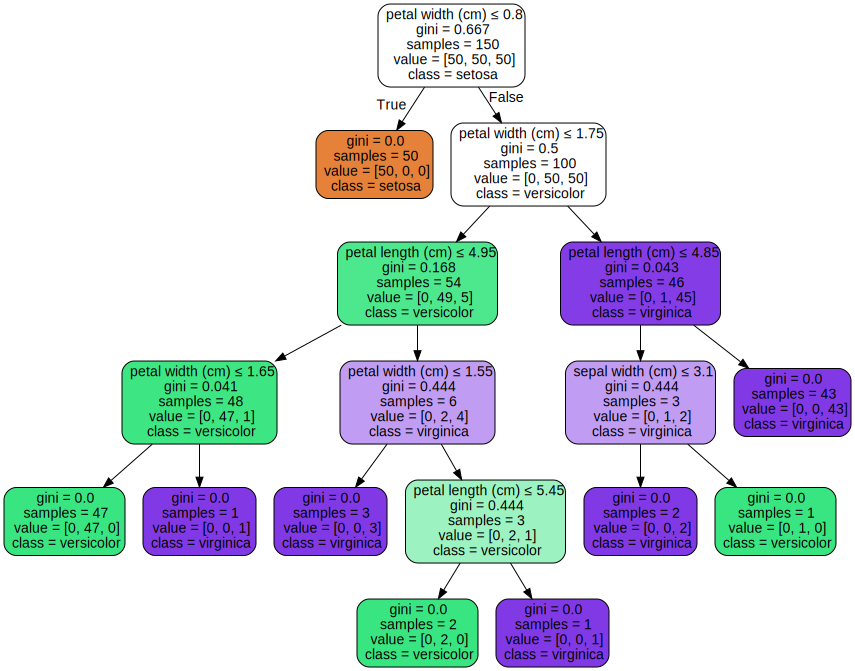

In [52]:
# Decision tree
# Source: http://scikit-learn.org/stable/modules/tree.html

from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph